Inicialización del proyecto

In [6]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
#importación de las librerías necesarias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Librerias de sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [8]:
#Cargar la base de datos
df = pd.read_csv('Enfermedades_Cr_nicas_20250409.csv')
print(df.head())

   EDAD                         PLAN_BENEFICIOS  \
0    49                  PACIENTES PARTICULARES   
1    49                  PACIENTES PARTICULARES   
2    68  CAPITAL SALUD EPS SAS - PGP SUBSIDIADO   
3    82  CAPITAL SALUD EPS SAS - PGP SUBSIDIADO   
4    59  CAPITAL SALUD EPS SAS - PGP SUBSIDIADO   

                                    SEDE                       NOMBRE_DIAG  \
0  CENTRO DE SALUD TIPO II SAN CRISTÓBAL  HIPERTENSION ESENCIAL (PRIMARIA)   
1  CENTRO DE SALUD TIPO II SAN CRISTÓBAL  HIPERTENSION ESENCIAL (PRIMARIA)   
2  CENTRO DE SALUD TIPO II SAN CRISTÓBAL  HIPERTENSION ESENCIAL (PRIMARIA)   
3  CENTRO DE SALUD TIPO II SAN CRISTÓBAL  HIPERTENSION ESENCIAL (PRIMARIA)   
4  CENTRO DE SALUD TIPO II SAN CRISTÓBAL  HIPERTENSION ESENCIAL (PRIMARIA)   

   PESO  TALLA    IMC CARDIOVASCULAR PULMONAR NEUROLÓGICO  ... covid1 covid2  \
0  76.0    157  30.83         Normal   Normal      Normal  ...     Si     Si   
1  76.0    157  30.83         Normal   Normal      Normal  ...  

In [9]:
df.shape

(2602, 29)

In [10]:
df.describe()

,EDAD,PESO,TALLA
count,2602.000000,2602.000000,2602.000000
mean,68.269792,64.020292,150.530746
std,13.076867,17.943791,30.022547
min,6.000000,0.000000,0.000000
25%,61.000000,55.000000,149.000000
50%,69.000000,64.000000,155.000000
75%,77.000000,74.000000,161.000000
max,102.000000,175.000000,300.000000


In [11]:
df.columns.to_list()

['EDAD',
 'PLAN_BENEFICIOS',
 'SEDE',
 'NOMBRE_DIAG',
 'PESO',
 'TALLA',
 'IMC',
 'CARDIOVASCULAR',
 'PULMONAR',
 'NEUROLÓGICO',
 'MENTAL',
 'OSTEOMUSCULAR',
 'BODEX',
 'RESULTADOIMC',
 'ESCALA DISNEA',
 'RIESGO CARDIOVASCULAR',
 'EPOCCONFIRMADO',
 'CLASIFISUI',
 'DISCAPACIDAD',
 'covid1',
 'covid2',
 'covid3',
 'GENERO',
 'IDENTGEN',
 'ORIGSEX',
 'GRUPO ETNICO',
 'NIVELEDUCATIVO',
 'TIPODISCAPAC',
 'OCUPACION']

In [12]:
#valores nulos
df.isnull().sum()

EDAD                     0
PLAN_BENEFICIOS          0
SEDE                     0
NOMBRE_DIAG              0
PESO                     0
TALLA                    0
IMC                      0
CARDIOVASCULAR           0
PULMONAR                 0
NEUROLÓGICO              0
MENTAL                   0
OSTEOMUSCULAR            0
BODEX                    0
RESULTADOIMC             0
ESCALA DISNEA            0
RIESGO CARDIOVASCULAR    0
EPOCCONFIRMADO           0
CLASIFISUI               0
DISCAPACIDAD             0
covid1                   0
covid2                   0
covid3                   0
GENERO                   0
IDENTGEN                 0
ORIGSEX                  0
GRUPO ETNICO             0
NIVELEDUCATIVO           0
TIPODISCAPAC             0
OCUPACION                0
dtype: int64

In [13]:
#valores duplicados
df.duplicated().sum()

np.int64(849)

In [14]:
#eliminar los duplicados antes de separar las columnas
df_sin_duplicados = df.drop_duplicates()
print(df_sin_duplicados)

      EDAD                                    PLAN_BENEFICIOS  \
0       49                             PACIENTES PARTICULARES   
2       68             CAPITAL SALUD EPS SAS - PGP SUBSIDIADO   
3       82             CAPITAL SALUD EPS SAS - PGP SUBSIDIADO   
4       59             CAPITAL SALUD EPS SAS - PGP SUBSIDIADO   
5       57             CAPITAL SALUD EPS SAS - PGP SUBSIDIADO   
...    ...                                                ...   
2593    72  CAPITA SANITAS SUBSIDIADO – EN INTERVENCIÓN BA...   
2594    70  CAPITA SANITAS SUBSIDIADO – EN INTERVENCIÓN BA...   
2596    59  COOSALUD ENTIDAD PROMOTORA DE SALUD S.A.S CAPI...   
2597    79  COOSALUD ENTIDAD PROMOTORA DE SALUD S.A.S CAPI...   
2599    54  COOSALUD ENTIDAD PROMOTORA DE SALUD S.A.S CAPI...   

                                       SEDE                       NOMBRE_DIAG  \
0     CENTRO DE SALUD TIPO II SAN CRISTÓBAL  HIPERTENSION ESENCIAL (PRIMARIA)   
2     CENTRO DE SALUD TIPO II SAN CRISTÓBAL  HIPERTENSION

In [15]:
df_sin_duplicados['MENTAL'].value_counts()

MENTAL
Normal         1621
No Registra      72
Anormal          60
Name: count, dtype: int64

In [16]:
#creación del dataframe con las columnas necesarias
columns = ['MENTAL','EDAD','GENERO','NIVELEDUCATIVO','NEUROLÓGICO','DISCAPACIDAD']
df_columns = df_sin_duplicados[columns]

print(df_columns)

      MENTAL  EDAD    GENERO       NIVELEDUCATIVO NEUROLÓGICO DISCAPACIDAD
0     Normal    49  Femenino  14. Sin Informacion      Normal           No
2     Normal    68  Femenino  14. Sin Informacion      Normal           No
3     Normal    82  Femenino  14. Sin Informacion      Normal           No
4     Normal    59  Femenino  14. Sin Informacion      Normal           No
5     Normal    57  Femenino  14. Sin Informacion      Normal           No
...      ...   ...       ...                  ...         ...          ...
2593  Normal    72  Femenino  14. Sin Informacion      Normal           No
2594  Normal    70  Femenino  14. Sin Informacion      Normal           No
2596  Normal    59  Femenino  14. Sin Informacion      Normal           No
2597  Normal    79  Femenino  14. Sin Informacion      Normal           No
2599  Normal    54  Femenino   2. Básica Primaria      Normal           No

[1753 rows x 6 columns]


In [17]:
df_columns.describe()

,EDAD
count,1753.000000
mean,67.138049
std,13.527846
min,6.000000
25%,59.000000
50%,68.000000
75%,76.000000
max,102.000000


In [18]:
df_columns.isnull().sum()

MENTAL            0
EDAD              0
GENERO            0
NIVELEDUCATIVO    0
NEUROLÓGICO       0
DISCAPACIDAD      0
dtype: int64

In [19]:
#valores duplicados
df_columns.duplicated().sum()

np.int64(1208)

Analizando el comportamiento del traget

In [20]:
df_columns['MENTAL'].value_counts()

MENTAL
Normal         1621
No Registra      72
Anormal          60
Name: count, dtype: int64

In [31]:
# Filtrar el DataFrame para excluir las filas donde 'MENTAL' es 'No Registra' y eliminar valores nan
df_temp = df_columns.copy()
# Reemplaza la cadena 'No Registra' con valores NaN reales en la columna 'MENTAL'
df_temp['MENTAL'] = df_temp['MENTAL'].replace('No Registra', np.nan)

# Ahora, usa dropna() para eliminar filas donde 'MENTAL' es NaN
df_columns_filtered = df_temp.dropna(subset=['MENTAL']).copy()


In [32]:
# Verificar los cambios
print(df_columns_filtered['MENTAL'].value_counts())

MENTAL
Normal     1621
Anormal      60
Name: count, dtype: int64


proposito: clasificacion

Análisis EDA

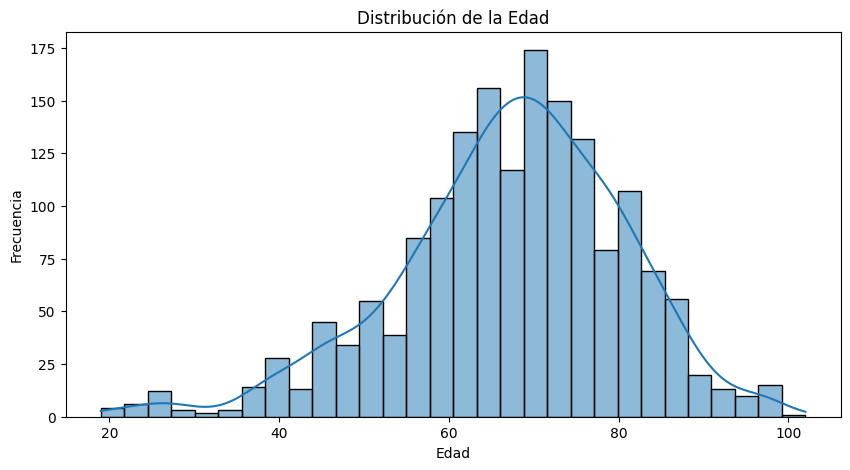

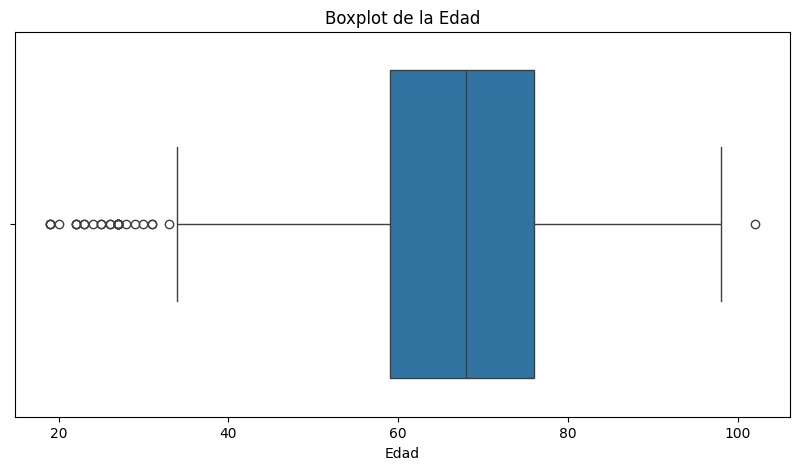

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(df_columns_filtered['EDAD'], kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_columns_filtered['EDAD'])
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.show()

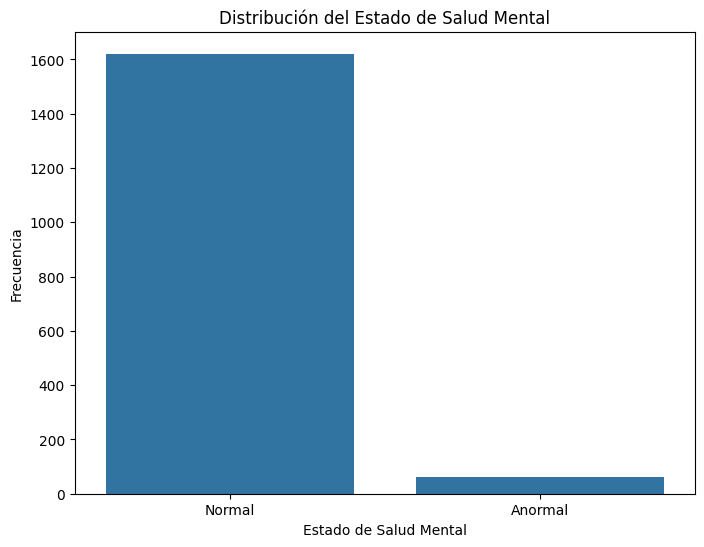

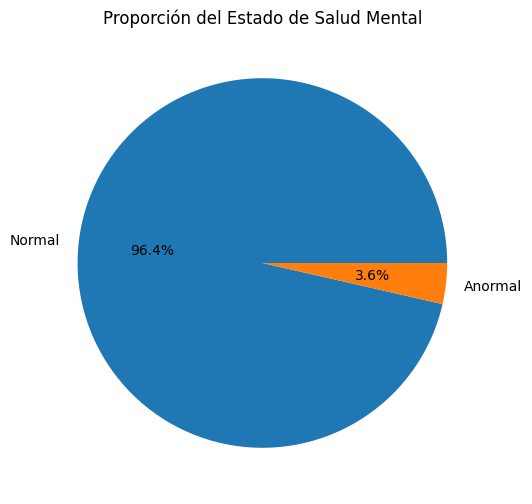

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_columns_filtered, x='MENTAL')
plt.title('Distribución del Estado de Salud Mental')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(8, 6))
df_columns_filtered['MENTAL'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción del Estado de Salud Mental')
plt.ylabel('')  # Para evitar la etiqueta 'MENTAL' en el gráfico de pastel
plt.show()

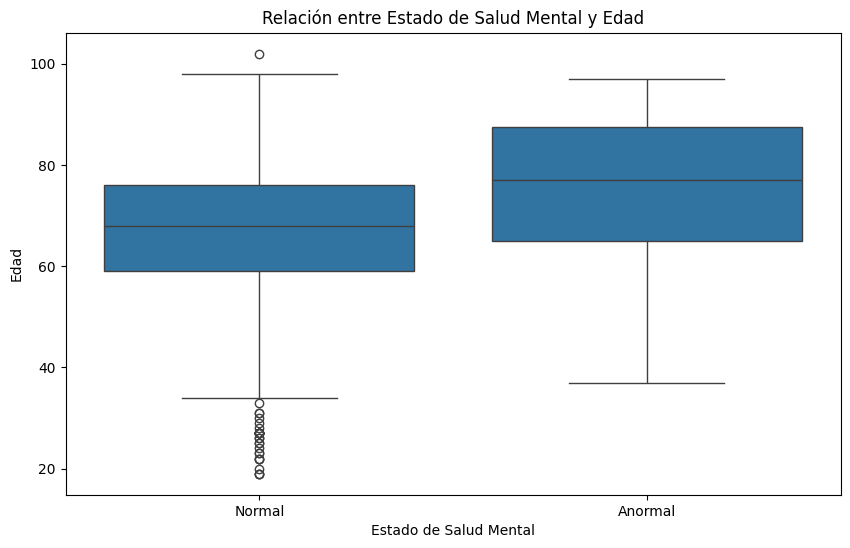

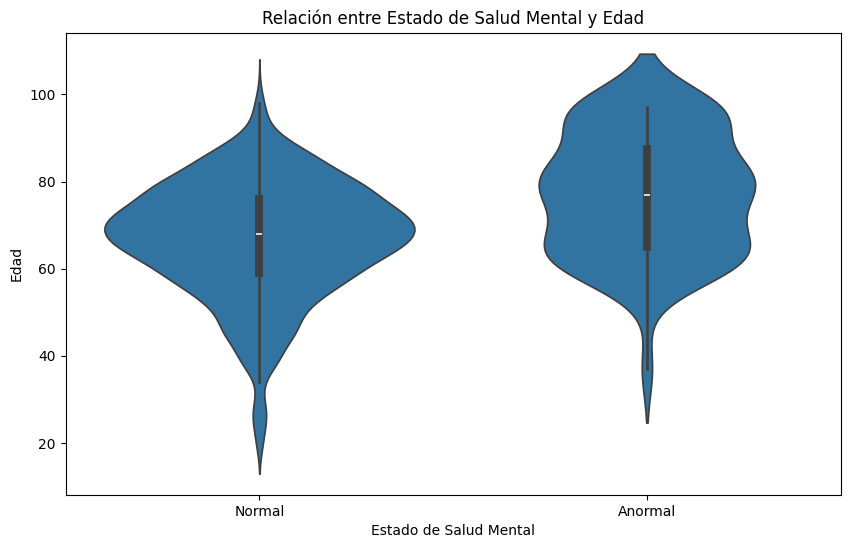

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_columns_filtered, x='MENTAL', y='EDAD')
plt.title('Relación entre Estado de Salud Mental y Edad')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Edad')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_columns_filtered, x='MENTAL', y='EDAD')
plt.title('Relación entre Estado de Salud Mental y Edad')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Edad')
plt.show()

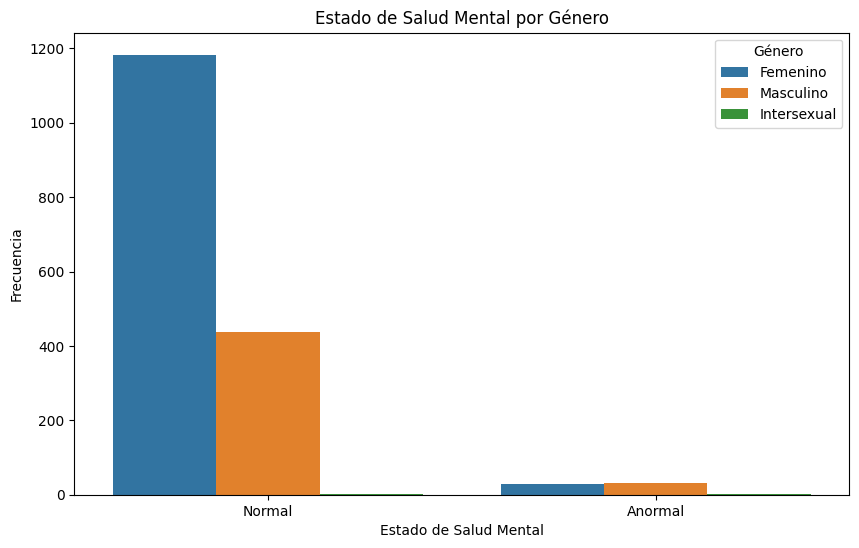

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_columns_filtered, x='MENTAL', hue='GENERO')
plt.title('Estado de Salud Mental por Género')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Frecuencia')
plt.legend(title='Género')
plt.show()

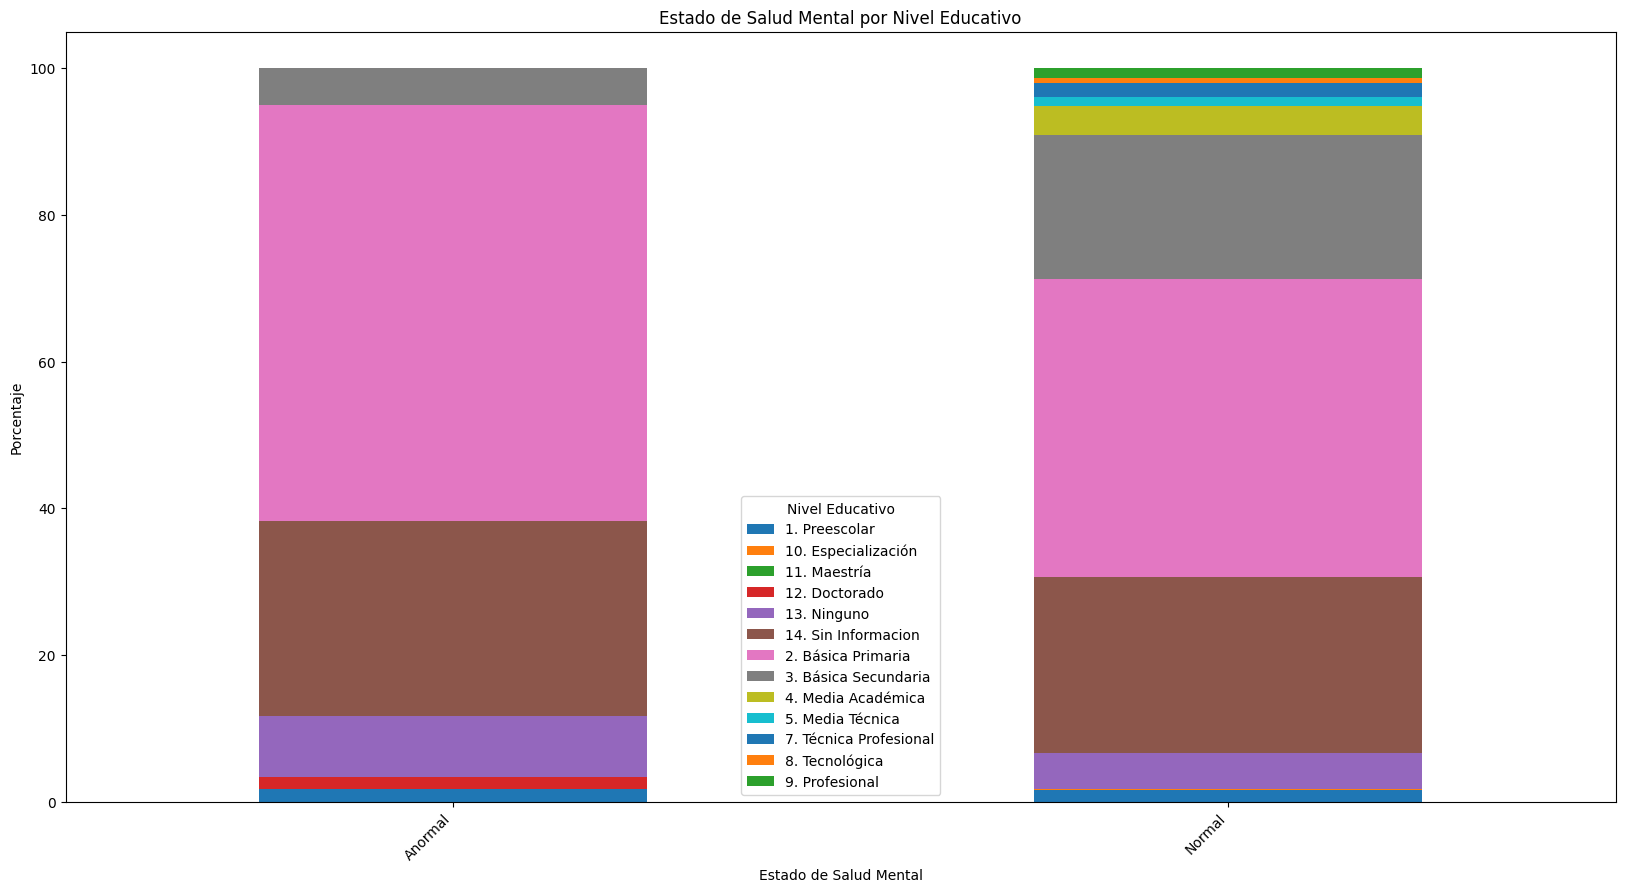

In [37]:
# Calcular los porcentajes
total_counts = df_columns_filtered.groupby('MENTAL')['NIVELEDUCATIVO'].count()
group_counts = df_columns_filtered.groupby(['MENTAL', 'NIVELEDUCATIVO']).size().unstack()

group_percentages = group_counts.div(total_counts, axis=0) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(20, 10))

group_percentages.plot(kind='bar', stacked=True, ax=ax)

plt.title('Estado de Salud Mental por Nivel Educativo')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Nivel Educativo')

plt.show()

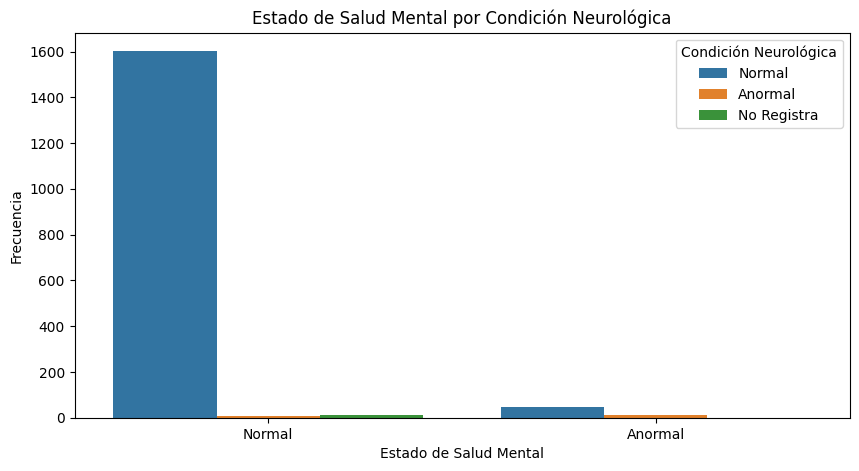

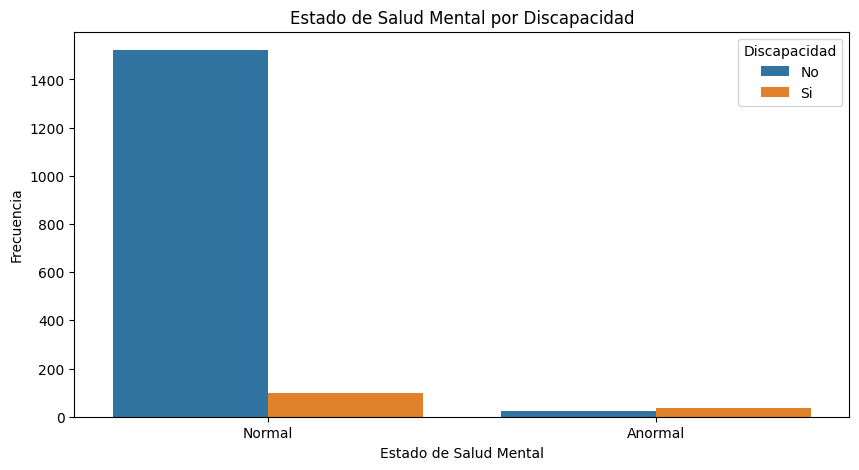

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_columns_filtered, x='MENTAL', hue='NEUROLÓGICO')
plt.title('Estado de Salud Mental por Condición Neurológica')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Frecuencia')
plt.legend(title='Condición Neurológica')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_columns_filtered, x='MENTAL', hue='DISCAPACIDAD')
plt.title('Estado de Salud Mental por Discapacidad')
plt.xlabel('Estado de Salud Mental')
plt.ylabel('Frecuencia')
plt.legend(title='Discapacidad')
plt.show()

Variables en las que me voy a centrar: EDAD,NIVELEDUCATIVO,DISCAPACIDAD

Siguiente paso: one hot encoder a todas menos mental y edad

In [47]:
# exclude the variables 'MENTAL' and 'EDAD'.
columns_to_exclude = ['MENTAL','EDAD']

# Identify all columns that are of 'object' dtype (typically strings/categorical)
# and are not in our exclusion list. These are the columns we want to encode.
categorical_cols_to_encode = [col for col in df_columns_filtered.columns
                              if df_columns_filtered[col].dtype == 'object'
                              and col not in columns_to_exclude]

print(f"Columns identified for one-hot encoding: {categorical_cols_to_encode}")
print(f"Columns to be excluded from encoding: {columns_to_exclude}")

# Apply one-hot encoding using pd.get_dummies.
df_encoded = pd.get_dummies(df_columns_filtered, columns=categorical_cols_to_encode, drop_first=True)

# --- Custom encoding for 'MENTAL' ---
# Map 'Normal' to 0 and 'Anormal' to 1
df_encoded['MENTAL'] = df_encoded['MENTAL'].map({'Normal': 0, 'Anormal': 1})

# --- Display results ---
print("\n--- Original DataFrame Head ---")
print(df_columns_filtered.head())

print("\n--- Encoded DataFrame Head ---")
print(df_encoded.head())

print("\n--- Columns in the Encoded DataFrame ---")
print(df_encoded.columns.tolist())

print(f"\nShape of original DataFrame: {df_columns_filtered.shape}")
print(f"Shape of encoded DataFrame: {df_encoded.shape}")

Columns identified for one-hot encoding: ['GENERO', 'NIVELEDUCATIVO', 'NEUROLÓGICO', 'DISCAPACIDAD']
Columns to be excluded from encoding: ['MENTAL', 'EDAD']

--- Original DataFrame Head ---
   MENTAL  EDAD    GENERO       NIVELEDUCATIVO NEUROLÓGICO DISCAPACIDAD
0  Normal    49  Femenino  14. Sin Informacion      Normal           No
2  Normal    68  Femenino  14. Sin Informacion      Normal           No
3  Normal    82  Femenino  14. Sin Informacion      Normal           No
4  Normal    59  Femenino  14. Sin Informacion      Normal           No
5  Normal    57  Femenino  14. Sin Informacion      Normal           No

--- Encoded DataFrame Head ---
   MENTAL  EDAD  GENERO_Intersexual  GENERO_Masculino  \
0       0    49               False             False   
2       0    68               False             False   
3       0    82               False             False   
4       0    59               False             False   
5       0    57               False             False   

  

Inicio de proceso de clasificación
REGRESIÓN LOGÍSTICA

In [48]:
df_encoded.head(2)

,MENTAL,EDAD,GENERO_Intersexual,GENERO_Masculino,NIVELEDUCATIVO_10. Especialización,NIVELEDUCATIVO_11. Maestría,NIVELEDUCATIVO_12. Doctorado,NIVELEDUCATIVO_13. Ninguno,NIVELEDUCATIVO_14. Sin Informacion,NIVELEDUCATIVO_2. Básica Primaria,NIVELEDUCATIVO_3. Básica Secundaria,NIVELEDUCATIVO_4. Media Académica,NIVELEDUCATIVO_5. Media Técnica,NIVELEDUCATIVO_7. Técnica Profesional,NIVELEDUCATIVO_8. Tecnológica,NIVELEDUCATIVO_9. Profesional,NEUROLÓGICO_No Registra,NEUROLÓGICO_Normal,DISCAPACIDAD_Si
0,0,49,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,0,68,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [45]:
df_encoded['MENTAL'].value_counts()

MENTAL
Normal     1621
Anormal      60
Name: count, dtype: int64

Cambios en el one hot
anormal = 1
normal = 0
False = 1
True = 0

In [ ]:

#Variables
# MENTAL es la variable objetivo

X = df_encoded.drop('MENTAL', axis=1) # Todas las columnas excepto 'MENTAL'
y = df_encoded['MENTAL'] # La columna 'MENTAL' es nuestra variable objetivo

# transformación de formato numérico para la regresión logistica
# Se mapea 'SIN_TRASTORNO_MENTAL' a 0 y 'CON_TRASTORNO_MENTAL' a 1.
y = y.map({'SIN_TRASTORNO_MENTAL': 0, 'CON_TRASTORNO_MENTAL': 1})

print(f"\nDimensiones de X (Características): {X.shape}")
print(f"Dimensiones de y (Variable Objetivo): {y.shape}")
print("\nPrimeros 5 valores de y (codificados):")
print(y.head())

#Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y es importante para clasificación si las clases están desbalanceadas,
# ya que asegura que la proporción de clases sea similar en train y test sets.

print(f"\nDimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

#Entrenamiento
# Inicializar el modelo de Regresión Logística
model_lr = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es bueno para datasets pequeños y para L1/L2 regularization

# Entrenar el modelo con los datos de entrenamiento
model_lr.fit(X_train, y_train)

print("\nModelo de Regresión Logística entrenado exitosamente.")

#Evaluación
# Realizar predicciones sobre el conjunto de prueba
y_pred = model_lr.predict(X_test)

print("\n--- Evaluación del Modelo de Regresión Logística ---")

# Precisión (Accuracy): Proporción de predicciones correctas
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy): {accuracy:.4f}")

# Reporte de Clasificación: Muestra precisión, recall, f1-score por clase
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['SIN_TRASTORNO_MENTAL (0)', 'CON_TRASTORNO_MENTAL (1)']))

# Matriz de Confusión: Muestra el número de verdaderos positivos/negativos y falsos positivos/negativos
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:")
print(cm)

# Visualizar la Matriz de Confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred. SIN_TRASTORNO_MENTAL', 'Pred. CON_TRASTORNO_MENTAL'],
            yticklabels=['Real SIN_TRASTORNO_MENTAL', 'Real CON_TRASTORNO_MENTAL'])
plt.title('Matriz de Confusión para Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Opcional: Coeficientes del modelo (importancia de las características)
print("\nCoeficientes del Modelo de Regresión Logística (importancia de las características):")
# Se imprimen en orden de las columnas de X
for feature, coef in zip(X.columns, model_lr.coef_[0]):
    print(f"{feature}: {coef:.4f}")

DataFrame codificado (df_encoded) listo. Sus primeras filas:
   MENTAL  EDAD  GENERO_Intersexual  GENERO_Masculino  \
0  Normal    49               False             False   
2  Normal    68               False             False   
3  Normal    82               False             False   
4  Normal    59               False             False   
5  Normal    57               False             False   

   NIVELEDUCATIVO_10. Especialización  NIVELEDUCATIVO_11. Maestría  \
0                               False                        False   
2                               False                        False   
3                               False                        False   
4                               False                        False   
5                               False                        False   

   NIVELEDUCATIVO_12. Doctorado  NIVELEDUCATIVO_13. Ninguno  \
0                         False                       False   
2                         False                  

ValueError: Input y contains NaN.